In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools
import cooler

In [8]:
# clr = cooler.Cooler('/home1/yxiao977/labwork/train_akita/data/5000res_0.5thres_hic.cool')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
total_length = 0
chromstarts = []
chromsizes = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])
    chro_extent_len = clr.extent(i)[1] - clr.extent(i)[0]
    total_length += chro_extent_len * clr.binsize
    chromsizes.append((i, chro_extent_len * clr.binsize))
print(f'total genome length: {total_length}')

chromosomes: ['chr1_pilon', 'chr2_pilon', 'chr3_pilon', 'chr4_pilon', 'chr5_pilon', 'chr6_pilon', 'chr7_pilon', 'chr8_pilon', 'chr9_pilon', 'chr10_pilon', 'chr11_pilon', 'chr12_pilon', 'chr13_pilon', 'chr14_pilon', 'chr15_pilon', 'chr16_pilon', 'chr17_pilon', 'chr18_pilon', 'chr19_pilon', 'chr20_pilon', 'chr21_pilon', 'chr22_pilon', 'chr23_pilon', 'chr24_pilon', 'chr25_pilon', 'chr26_pilon', 'chr27_pilon', 'chr28_pilon', 'chr29_pilon', 'chr30_pilon', 'chr31_pilon', 'chr32_pilon', 'chr33_pilon', 'chr34_pilon', 'chr35_pilon', 'chr36_pilon', 'chr37_pilon', 'chr38_pilon', 'chr39_pilon', 'chr40_pilon', 'chr41_pilon', 'chr42_pilon', 'chr43_pilon', 'chr44_pilon', 'chr45_pilon', 'chr46_pilon', 'chr47_pilon', 'chr48_pilon', 'chr49_pilon', 'chr50_pilon', 'chr51_pilon', 'chr52_pilon', 'chr53_pilon', 'chr54_pilon', 'chr55_pilon', 'chr56_pilon', 'chr57_pilon', 'chr58_pilon', 'chr59_pilon', 'chr60_pilon', 'chr61_pilon', 'chr62_pilon', 'chr63_pilon', 'chr64_pilon', 'chr65_pilon', 'chr66_pilon', 'chr6

In [12]:
clr.matrix(balance=True).fetch('chr85_pilon:130000-380000')

array([[0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.        , 0.        ,        nan, ..., 0.43044577, 0.04219391,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.04219391, 0.34170167,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ]])

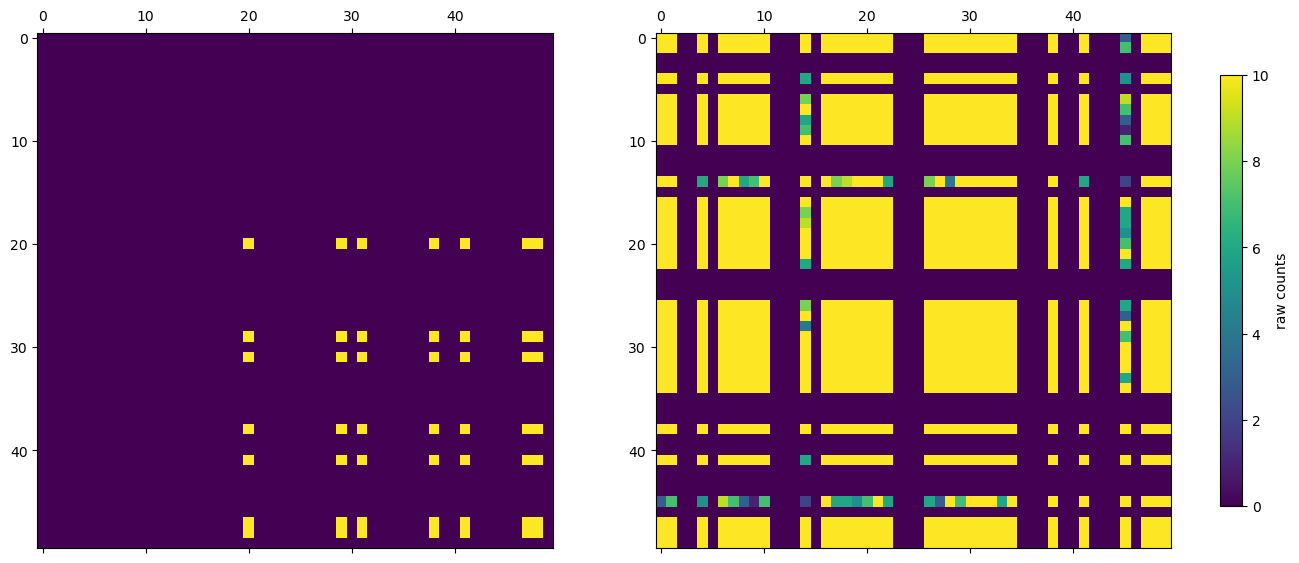

In [15]:
clr = cooler.Cooler('/home1/yxiao977/sc1/test_func/test_cool_0.5thres.cool')

f, axs = plt.subplots(1, 2)
im = axs[0].matshow((clr.matrix(balance=False).fetch('chr85_pilon:130000-380000')), vmax=10, vmin=0)
# axs[0].set(xticks=chromstarts[:2], xticklabels=clr.chromnames[:2],
#        xlabel='position, chrom#', ylabel='position, bin#')
axs[0].xaxis.set_label_position('top')

clr2 = cooler.Cooler('/home1/yxiao977/sc1/test_func/test.cool')
im = axs[1].matshow((clr2.matrix(balance=False).fetch('chr85_pilon:130000-380000')), vmax=10, vmin=0)
# axs[1].set(xticks=chromstarts[:2], xticklabels=clr2.chromnames[:2],
#        xlabel='position, chrom#', ylabel='position, bin#')
axs[1].xaxis.set_label_position('top')

f.colorbar(im, fraction=0.046, pad=0.04, label='raw counts', ax=axs, shrink=0.7)
f.set_size_inches(16, 8)

# Visualize training slices

In [20]:
# from basenji import dataset
import sys
sys.path.append('/home1/yxiao977/labwork/train_akita/')
from masked_akita.basenji import dataset

import json
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib import pyplot as plt

### names of targets ###
data_dir =   '/home1/yxiao977/sc1/akita_dinoflagellate/real_data/1m/'

hic_targets = pd.read_csv(data_dir+'/targets.txt',sep='\t')
hic_file_dict_num = dict(zip(hic_targets['index'].values, hic_targets['file'].values) )
hic_file_dict     = dict(zip(hic_targets['identifier'].values, hic_targets['file'].values) )
hic_num_to_name_dict = dict(zip(hic_targets['index'].values, hic_targets['identifier'].values) )

# read data parameters
data_stats_file = '%s/statistics.json' % data_dir
with open(data_stats_file) as data_stats_open:
    data_stats = json.load(data_stats_open)
seq_length = data_stats['seq_length']
target_length = data_stats['target_length']
hic_diags =  data_stats['diagonal_offset']
target_crop = data_stats['crop_bp'] // data_stats['pool_width']
target_length1 = data_stats['seq_length'] // data_stats['pool_width']

sequences = pd.read_csv(data_dir+'sequences.bed', sep='\t', names=['chr','start','stop','type'])
sequences_train = sequences.iloc[sequences['type'].values=='train']
sequences_train.reset_index(inplace=True, drop=True)
train_data = dataset.SeqDataset(data_dir, 'train', batch_size=8)
train_inputs, train_targets, train_masks = train_data.numpy()

In [13]:
import numpy as np
np.sum(train_masks)

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


inf

In [3]:
data_dir = '/home1/yxiao977/sc1/train_akita/data/4m_unfiltered/'

sequences2 = pd.read_csv(data_dir+'sequences.bed', sep='\t', names=['chr','start','stop','type'])
sequences_train2 = sequences2.iloc[sequences2['type'].values=='train']
sequences_train2.reset_index(inplace=True, drop=True)
train_data2 = dataset.SeqDataset(data_dir, 'train', batch_size=8)
train_inputs2, train_targets2 = train_data2.numpy()


In [21]:
def from_upper_triu(vector_repr, matrix_len, num_diags):
    z = np.zeros((matrix_len,matrix_len))
    triu_tup = np.triu_indices(matrix_len,num_diags)
    z[triu_tup] = vector_repr
    for i in range(-num_diags+1,num_diags):
        set_diag(z, np.nan, i)
    return z + z.T

In [ ]:
import sys
sys.path.append('/home1/yxiao977/labwork/Akita_dinoflagellate/')
import data_util

clr = cooler.Cooler('/home1/yxiao977/sc1/test_func/test.cool')
cis_total_filter = data_util.cis_total_ratio_filter(0.5)
bin_mask = data_util.generate_bin_mask(clr, [cis_total_filter])
bad_bins = clr.bins()[:].loc[~bin_mask * (clr.bins()[:]['weight'] > 0)]

train_indices =  []
for i, row in bad_bins.iterrows():
    train_indices.append(np.where((sequences2['chr'].values == row['chrom']) *
                            (sequences2['start'].values <= row['start'])*
                            (sequences2['stop'].values >=  row['end']))[0])
train_indices = np.unique(train_indices)
train_indices = [v[0] for v in train_indices[1:]]

In [15]:
train_indices=list(range(20))

 
chr68_pilon:2150000-2400000


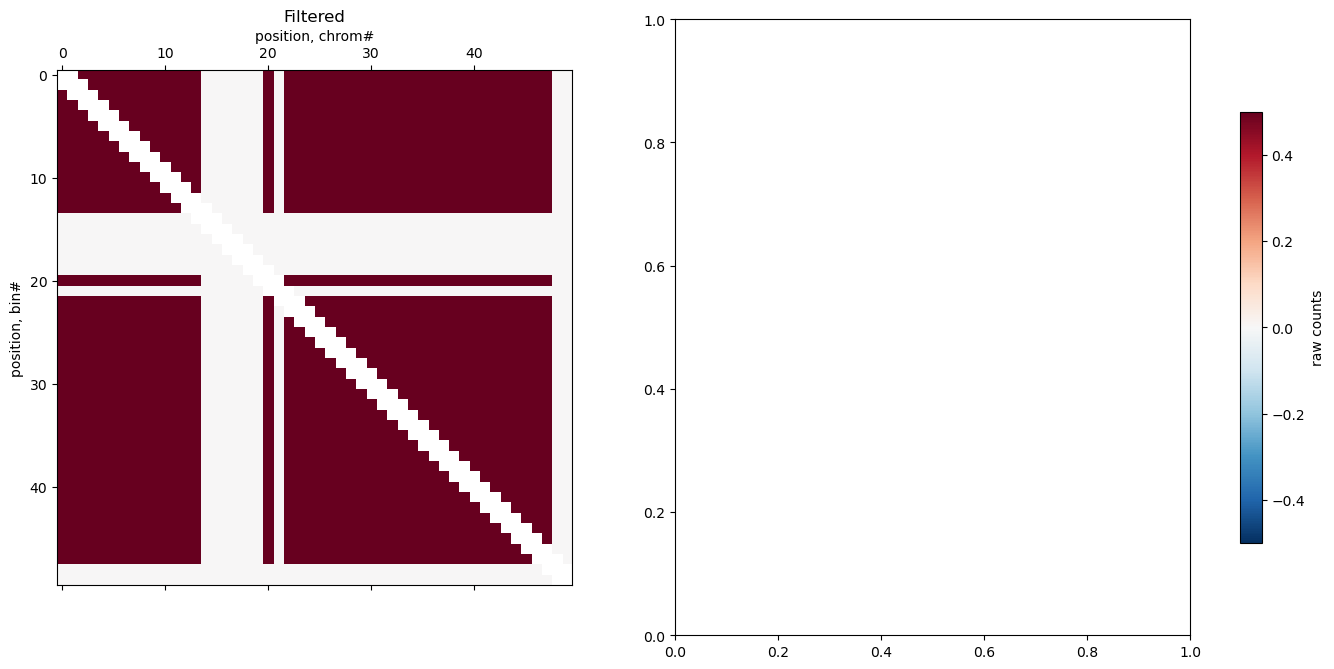

 
chr63_pilon:2255000-2505000


<Figure size 640x480 with 0 Axes>

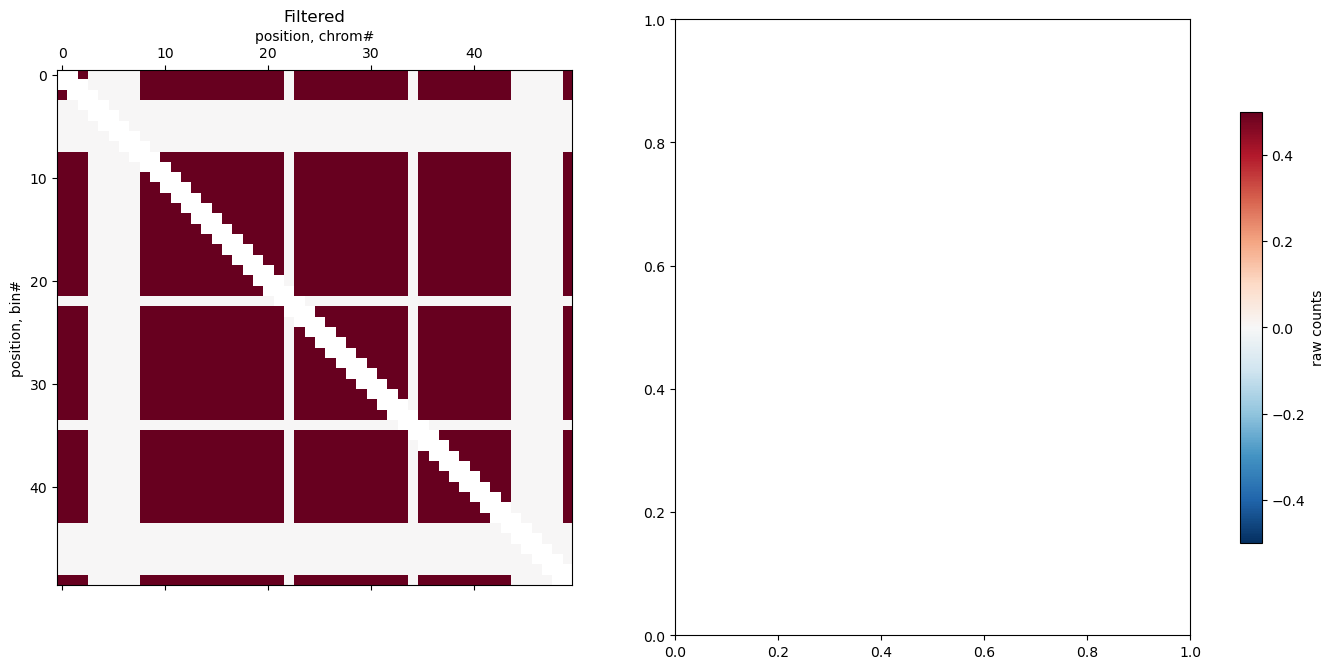

 
chr4_pilon:9500000-9750000


<Figure size 640x480 with 0 Axes>

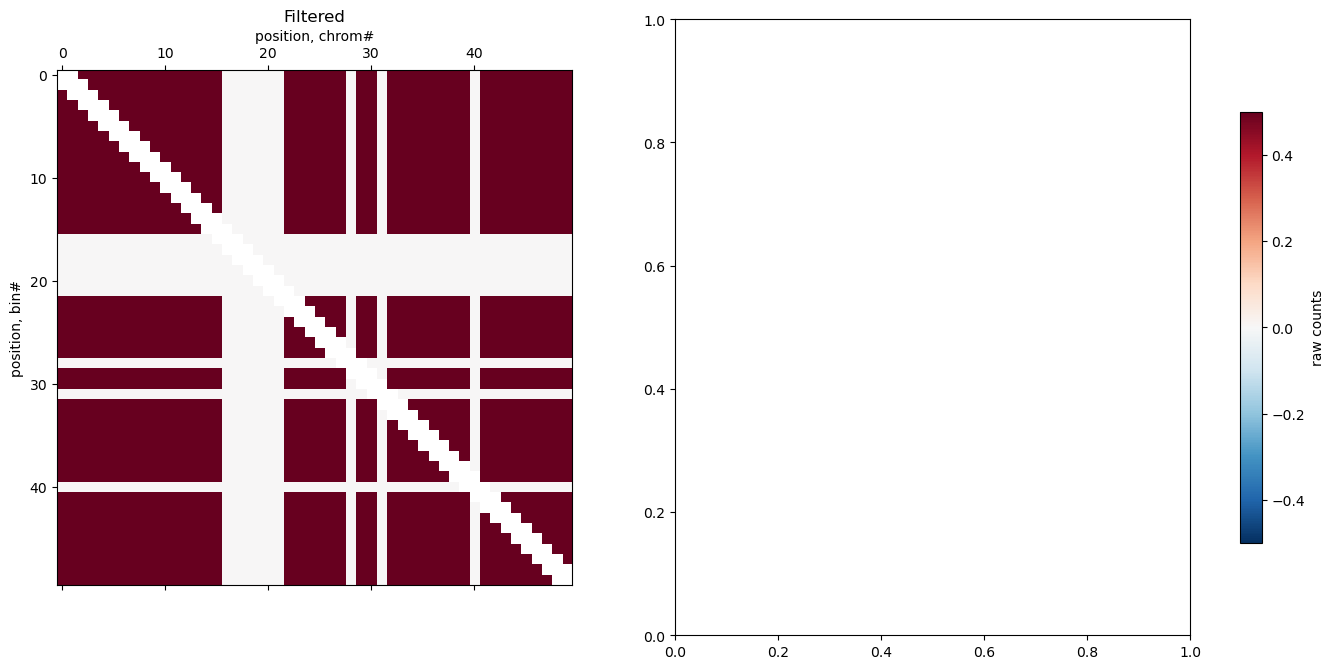

 
chr53_pilon:4250000-4500000


<Figure size 640x480 with 0 Axes>

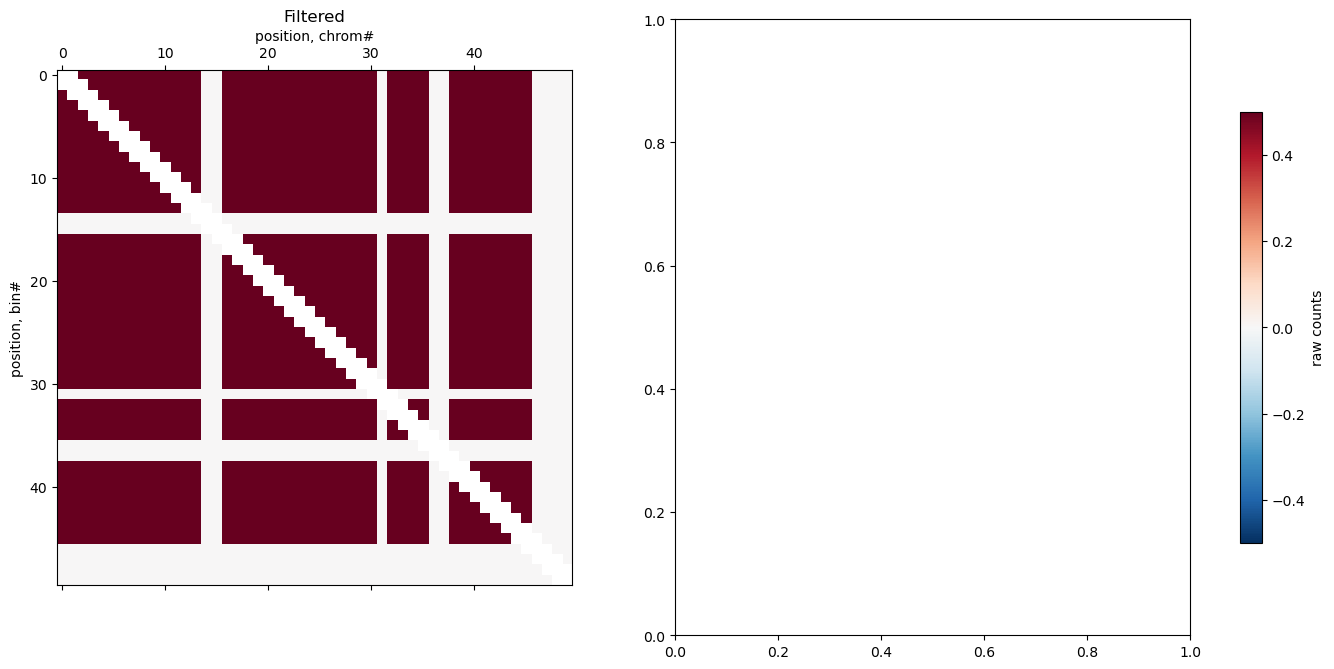

 
chr5_pilon:8775000-9025000


<Figure size 640x480 with 0 Axes>

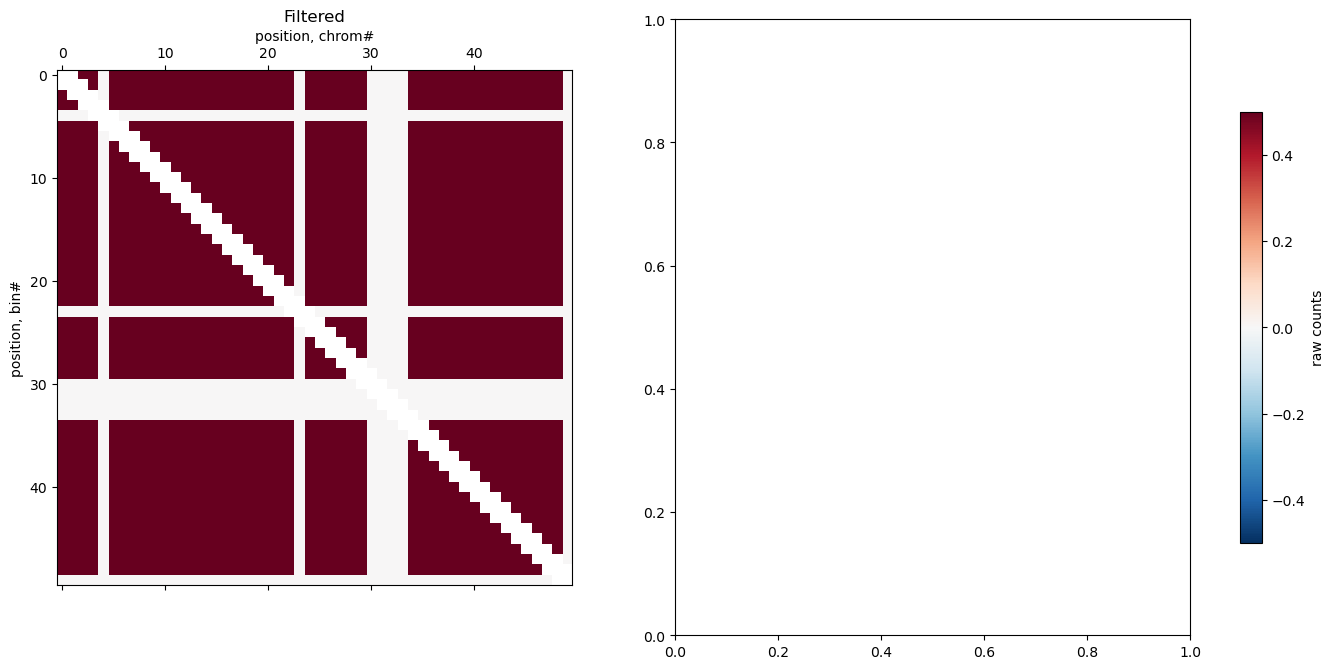

 
chr54_pilon:4950000-5200000


<Figure size 640x480 with 0 Axes>

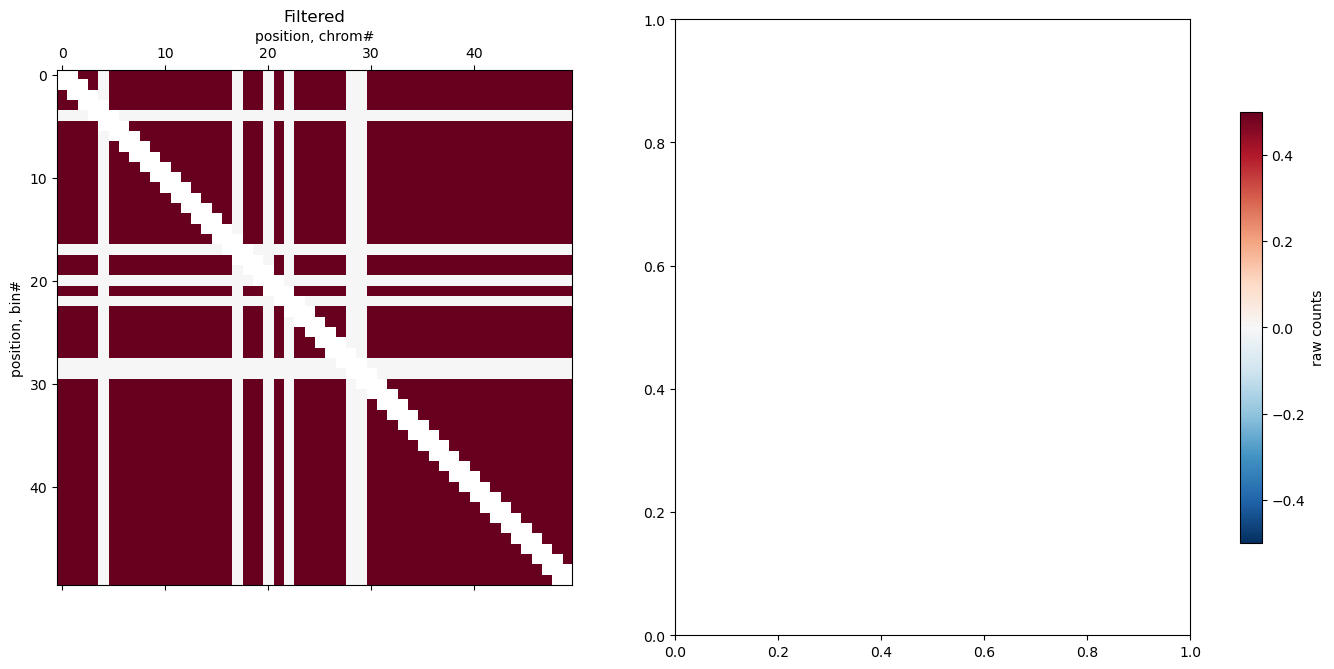

 
chr56_pilon:1450000-1700000


<Figure size 640x480 with 0 Axes>

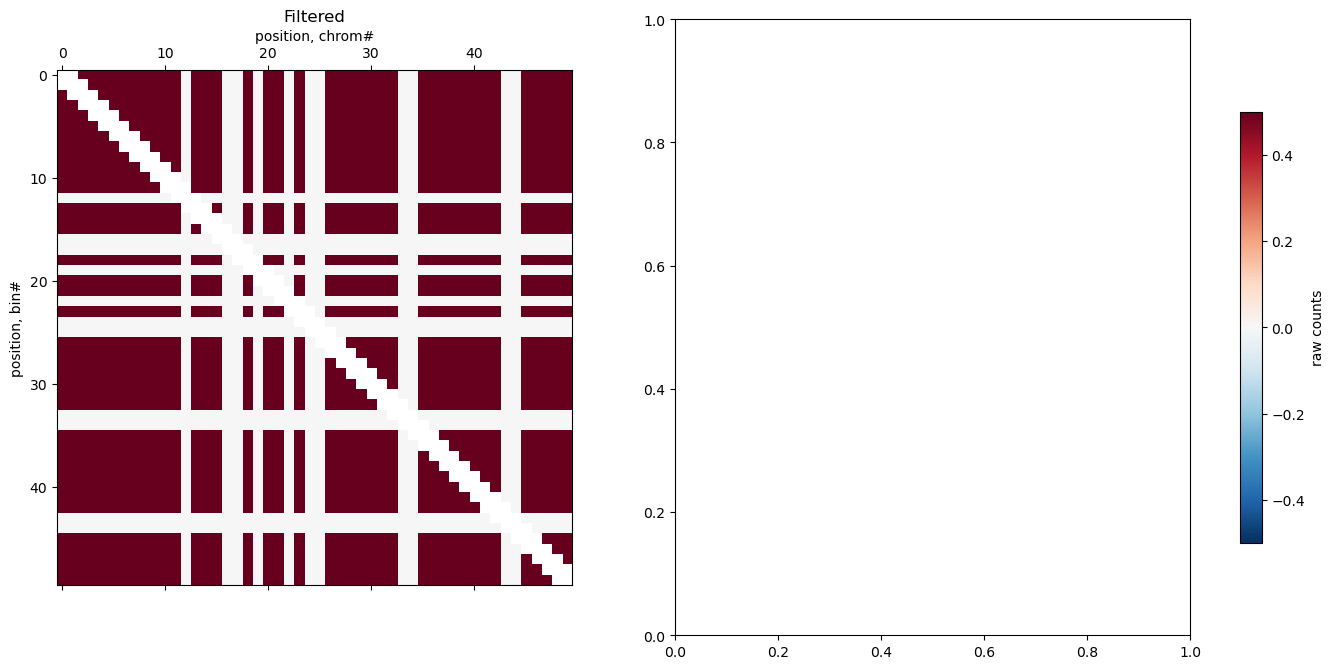

 
chr27_pilon:4250000-4500000


<Figure size 640x480 with 0 Axes>

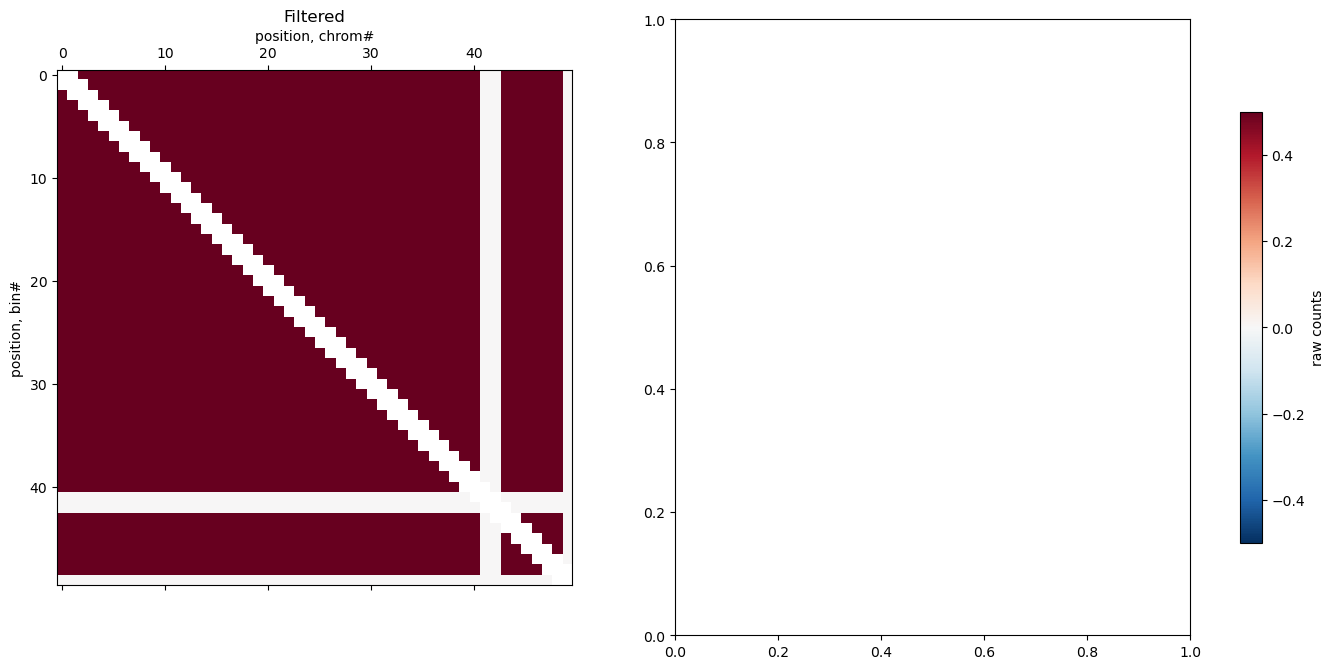

 
chr26_pilon:2300000-2550000


<Figure size 640x480 with 0 Axes>

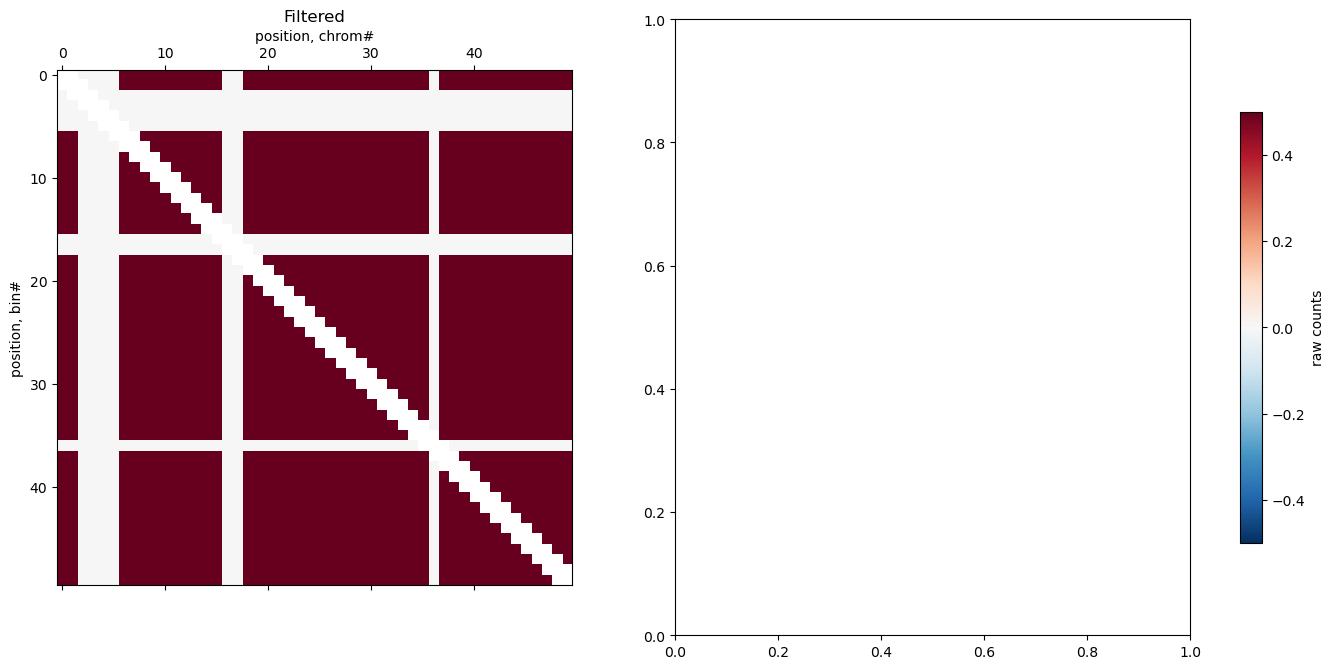

 
chr29_pilon:4950000-5200000


<Figure size 640x480 with 0 Axes>

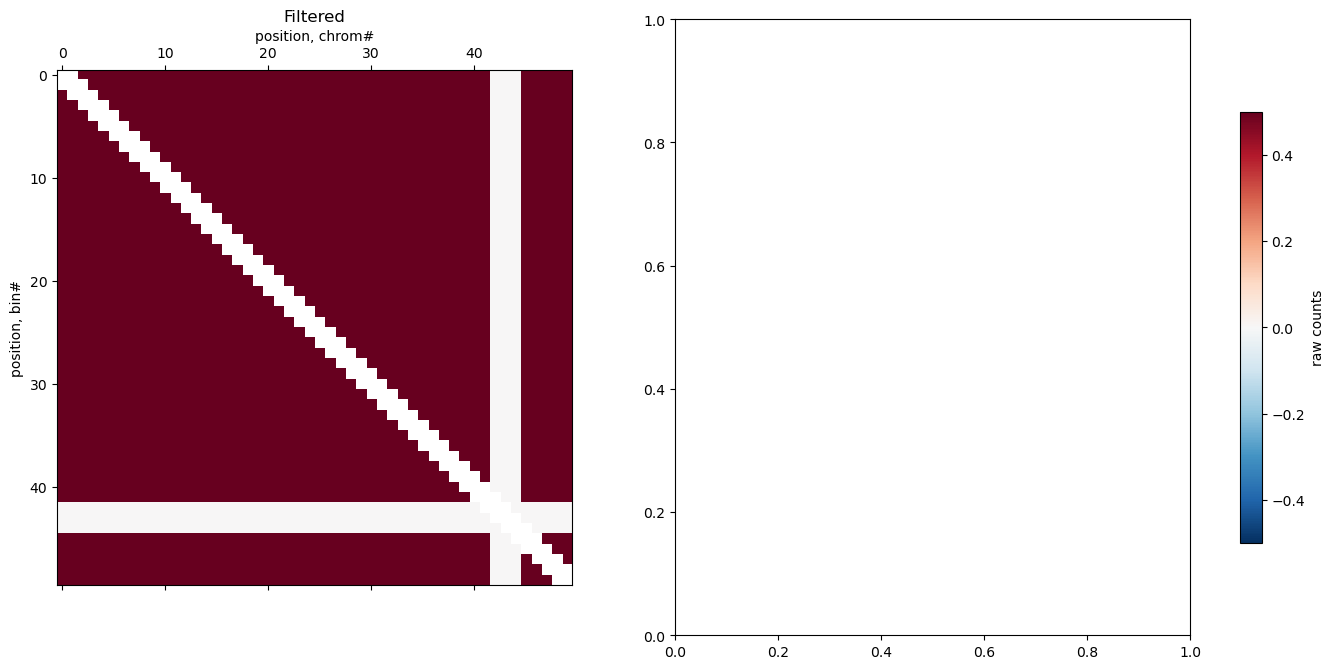

 
chr42_pilon:3305000-3555000


<Figure size 640x480 with 0 Axes>

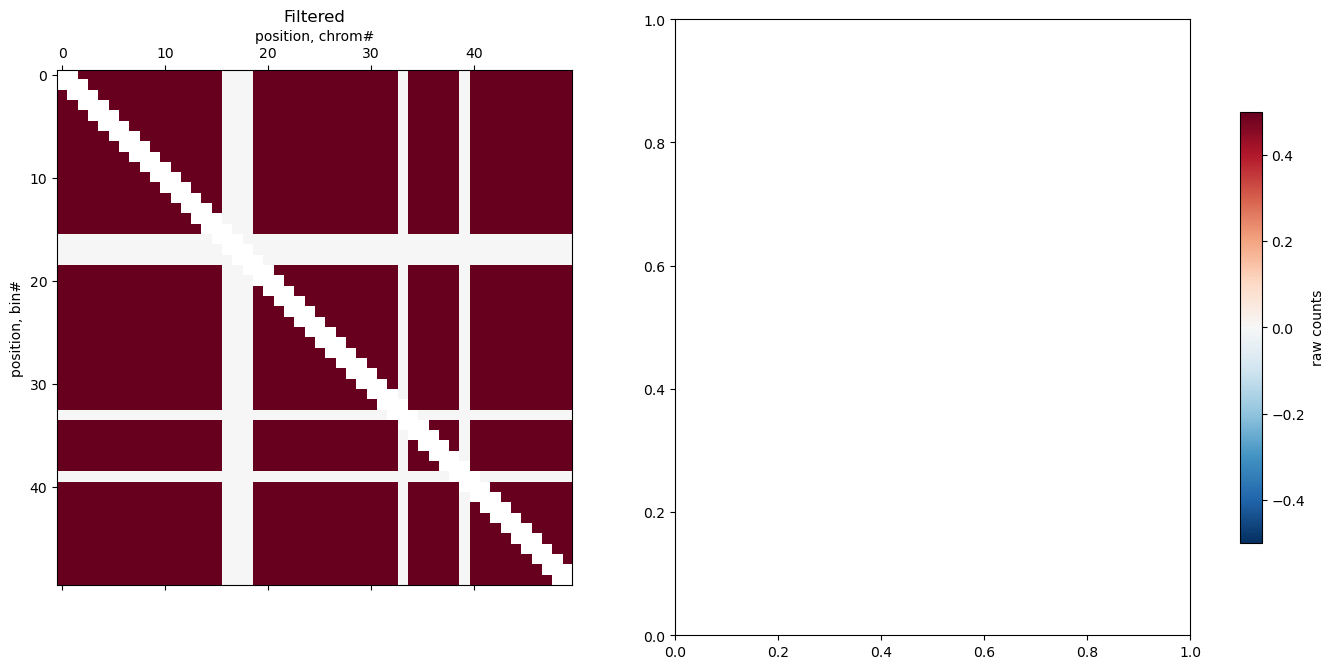

 
chr15_pilon:800000-1050000


<Figure size 640x480 with 0 Axes>

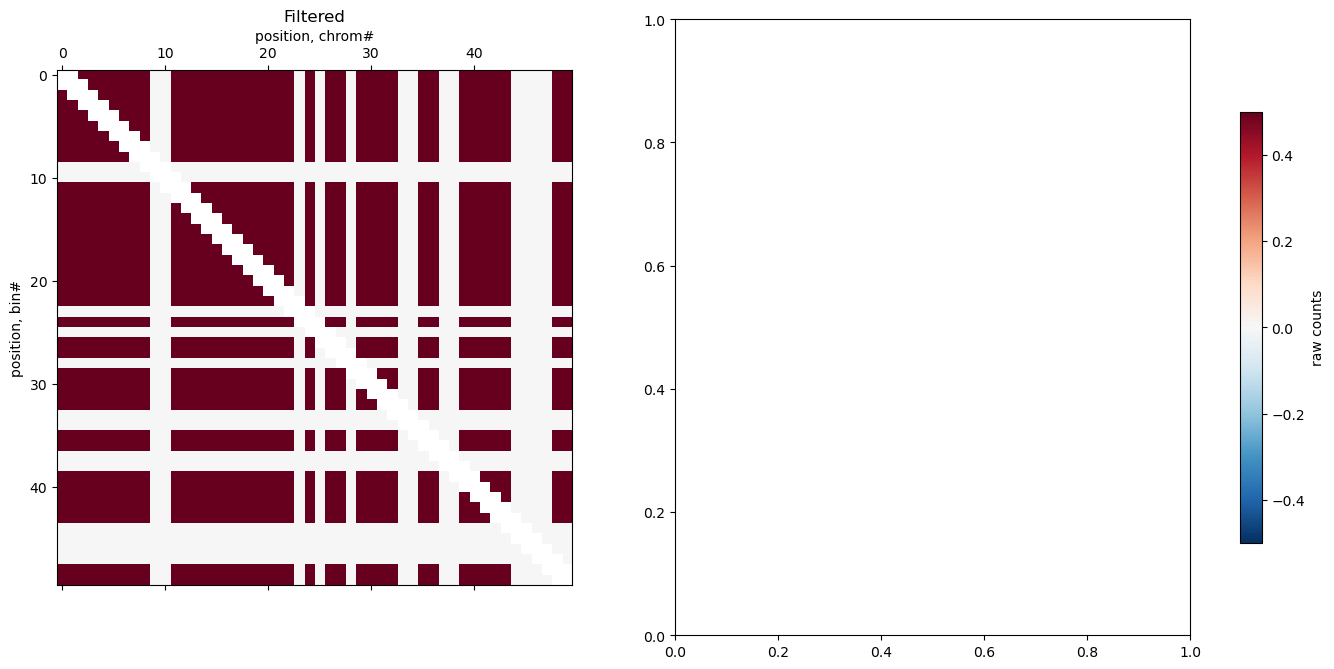

 
chr13_pilon:8365000-8615000


<Figure size 640x480 with 0 Axes>

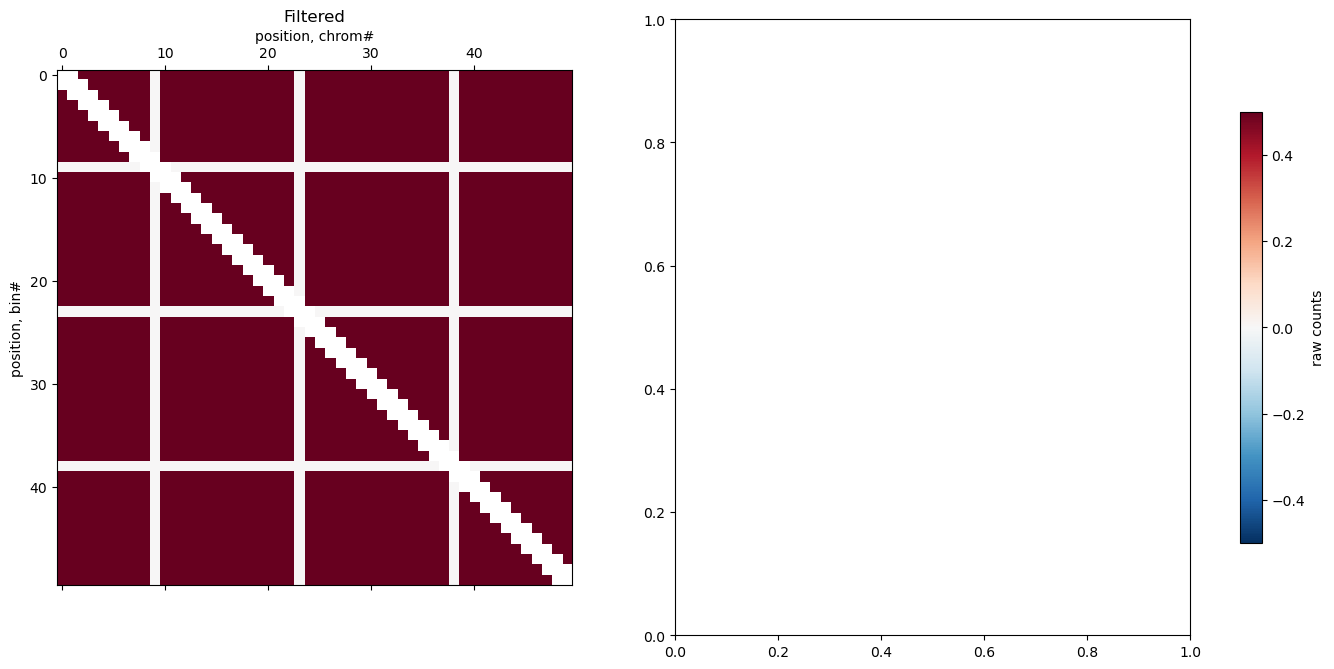

 
chr16_pilon:6750000-7000000


<Figure size 640x480 with 0 Axes>

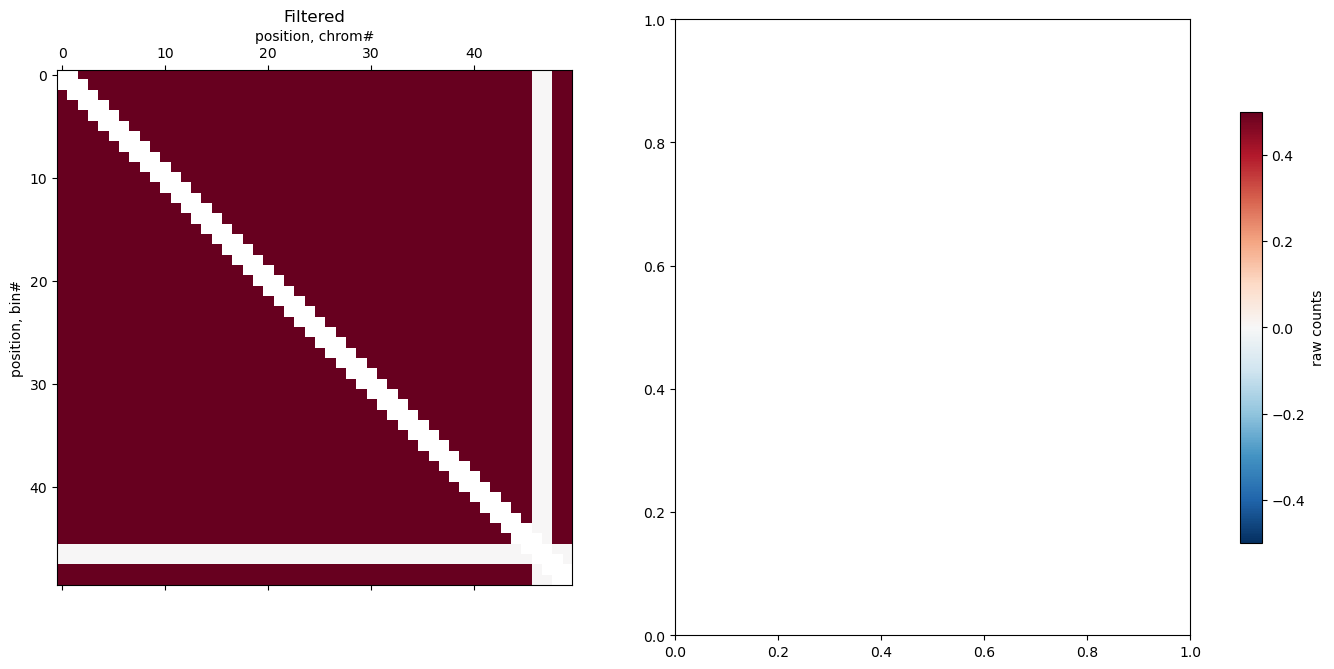

 
chr28_pilon:350000-600000


<Figure size 640x480 with 0 Axes>

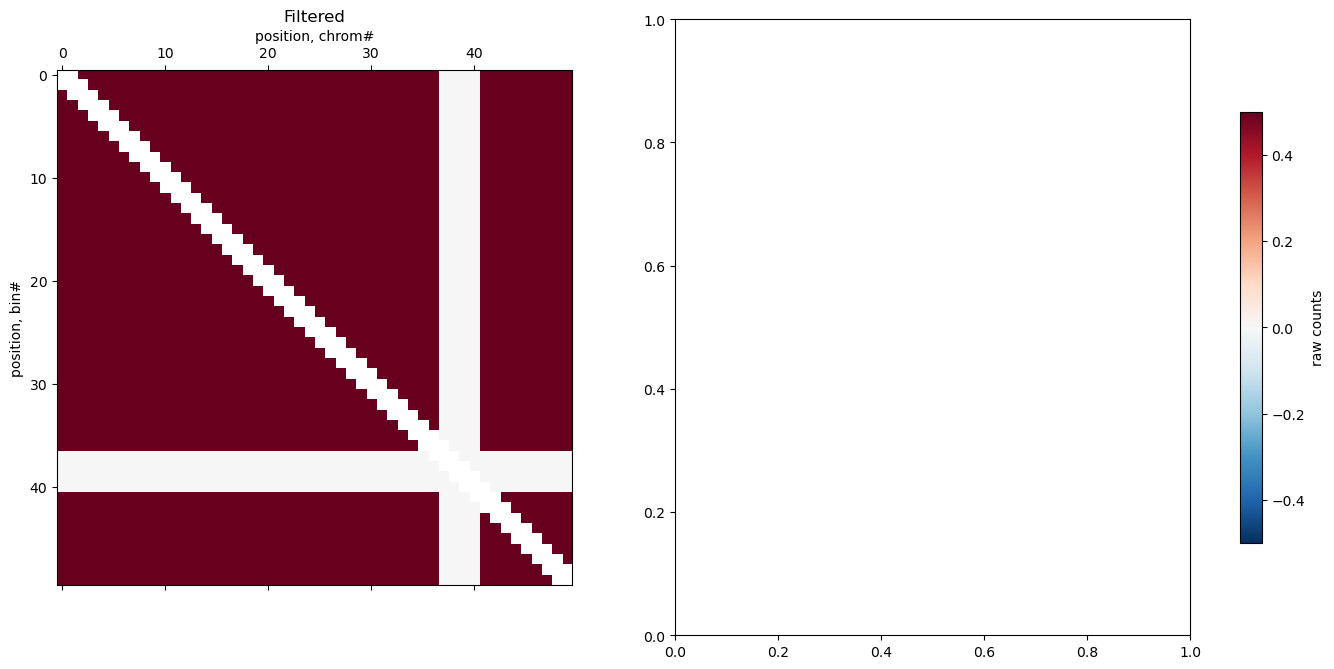

 
chr47_pilon:3400000-3650000


<Figure size 640x480 with 0 Axes>

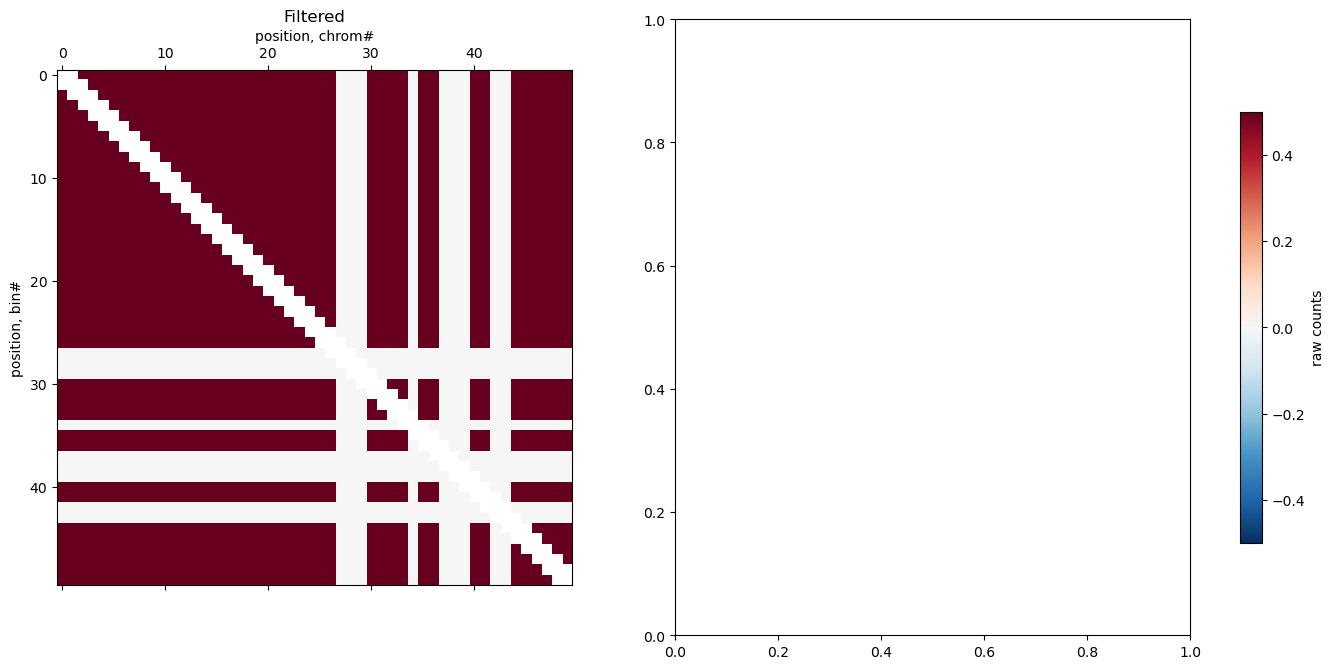

 
chr46_pilon:5595000-5845000


<Figure size 640x480 with 0 Axes>

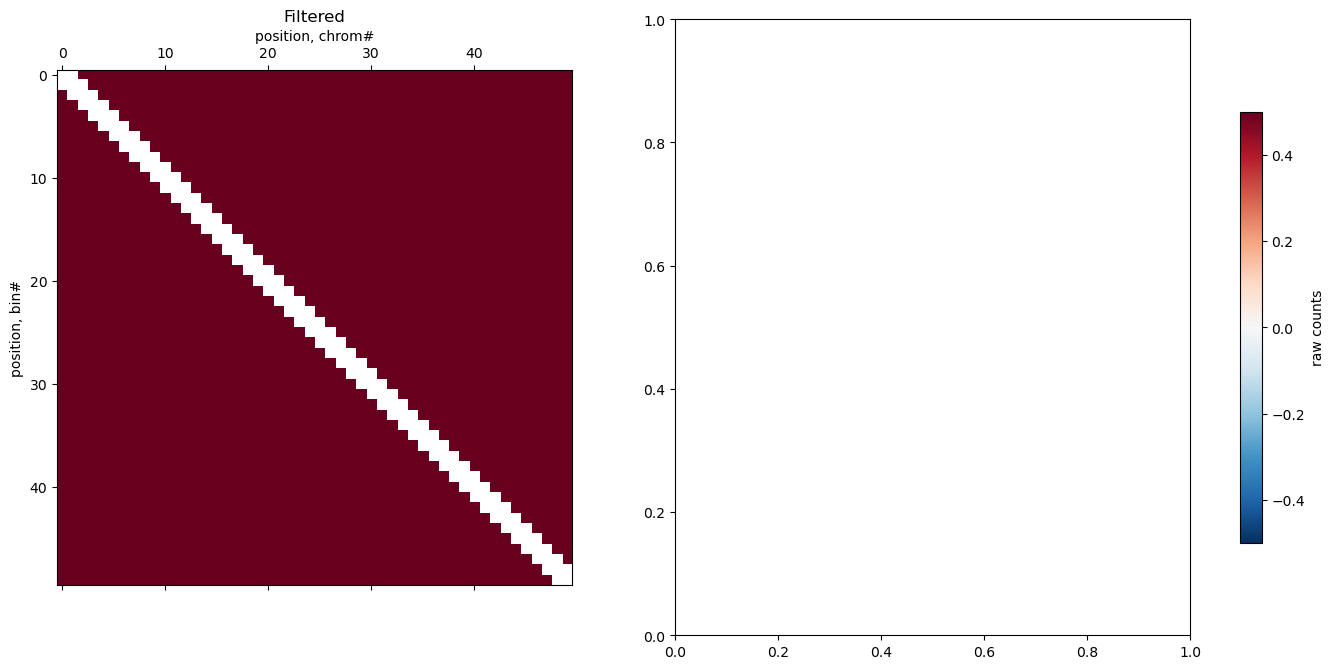

 
chr68_pilon:3150000-3400000


<Figure size 640x480 with 0 Axes>

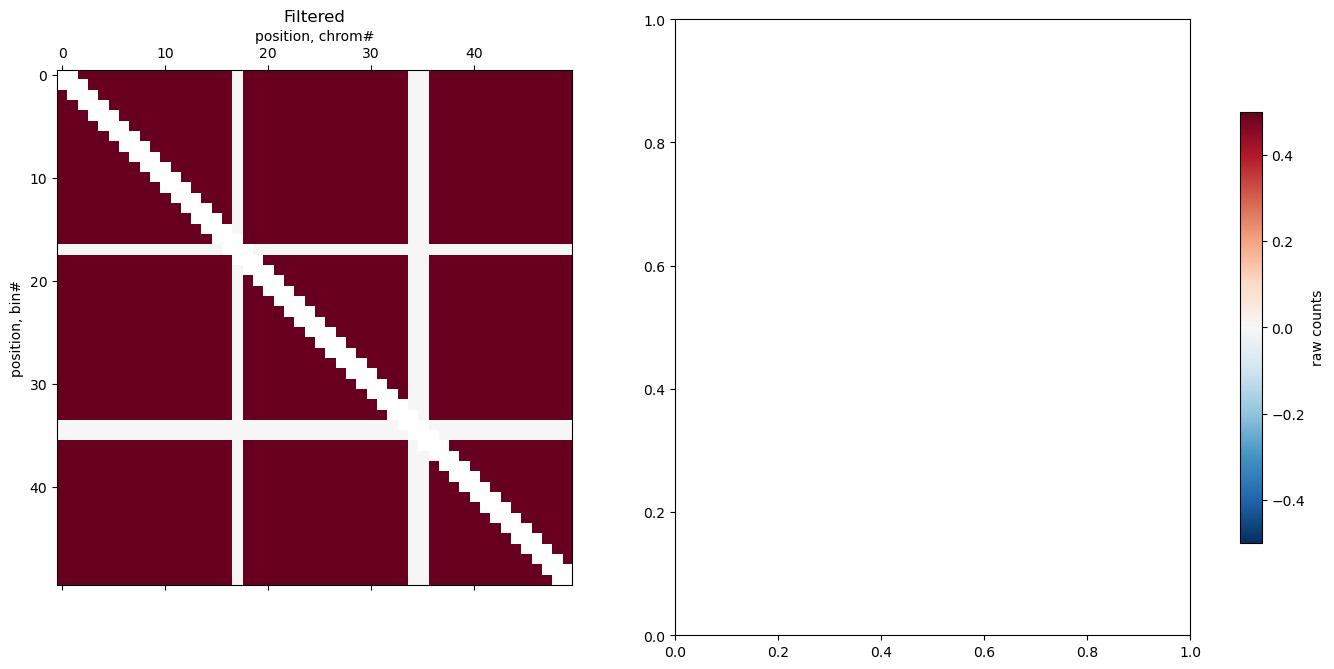

 
chr68_pilon:5450000-5700000


<Figure size 640x480 with 0 Axes>

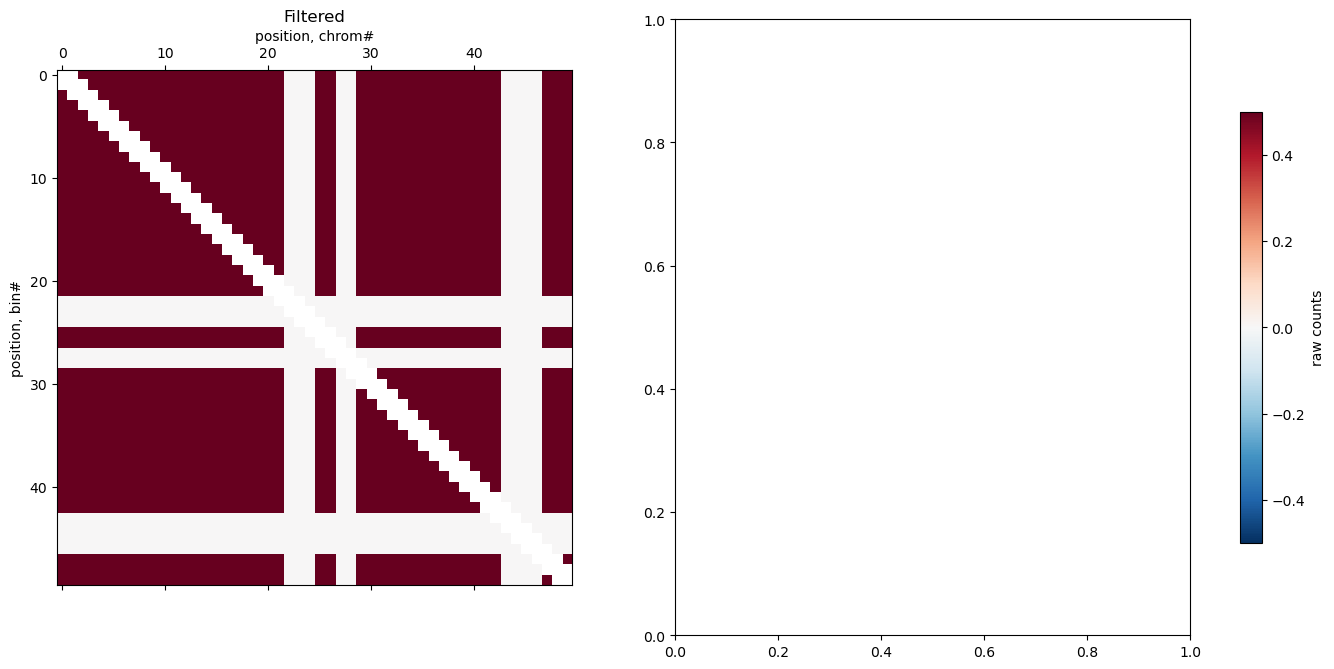

 
chr63_pilon:1500000-1750000


<Figure size 640x480 with 0 Axes>

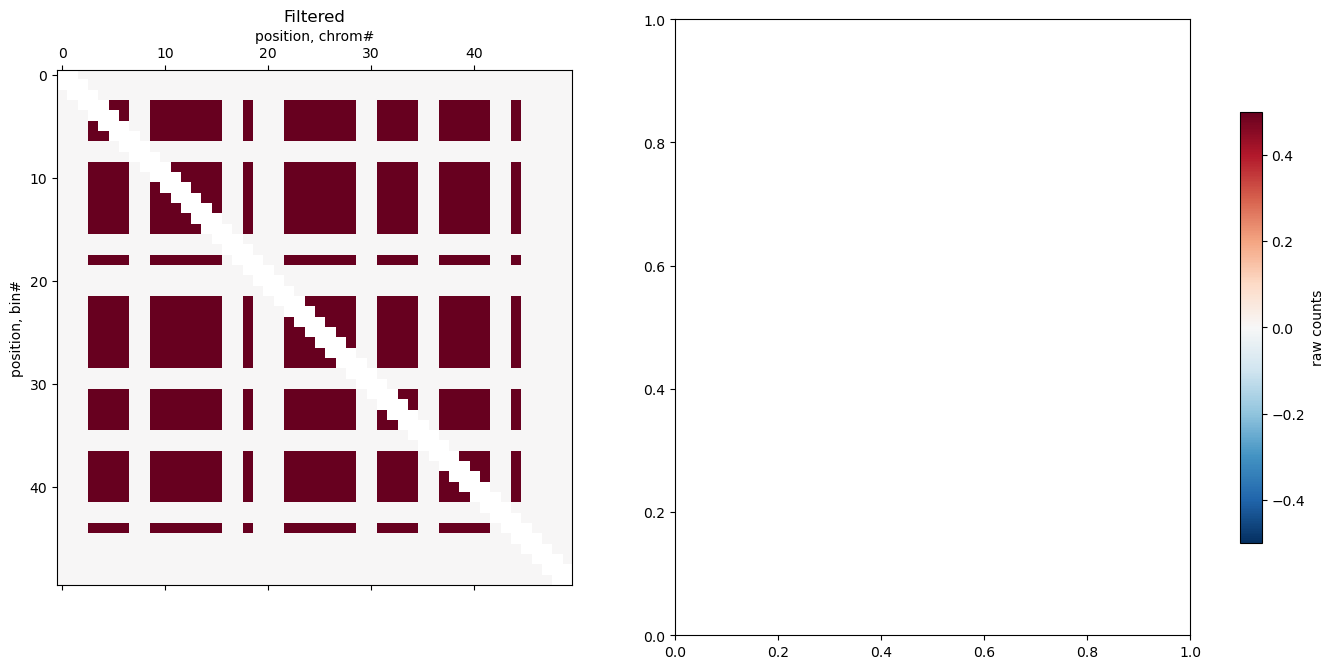

<Figure size 640x480 with 0 Axes>

In [23]:
from cooltools.lib.numutils import set_diag
# Visualize train slices 

# train_indices = np.random.randint(low=0, high=len(sequences_train.index) - 1, size=100)

target_index = 0 # HFF 

for train_index in train_indices:

    chrm, seq_start, seq_end = sequences_train.iloc[train_index][0:3]
    myseq_str = chrm+':'+str(seq_start)+'-'+str(seq_end)
    print(' ')
    print(myseq_str)

    train_target = train_targets[train_index:train_index+1,:,:]

    target_index = 0
    target_length1_cropped = 50
    hic_diag = 2
    vmin=-0.5
    vmax=0.5

    f, axs = plt.subplots(1, 2)
    # plot filtered 
    mat = from_upper_triu(train_target[:,:,target_index], target_length1_cropped, hic_diags)
    im = axs[0].matshow(mat, vmax=vmax, vmin=vmin, cmap='RdBu_r')
    axs[0].set(xlabel='position, chrom#', ylabel='position, bin#')
    axs[0].xaxis.set_label_position('top')
    axs[0].title.set_text('Filtered')
    
    # # plot original 
    # origi_index = np.where( (sequences2['chr'].values== chrm) *
    #                      (sequences2['start'].values== int(seq_start))*
    #                      (sequences2['stop'].values==  int(seq_end)))[0][0]
    # train_target2 = train_targets2[origi_index:origi_index+1,:,:]
    # mat = from_upper_triu(train_target2[:,:,target_index], target_length1_cropped, hic_diags)
    # im = axs[1].matshow(mat, vmax=vmax, vmin=vmin)
    # axs[1].set(xlabel='position, chrom#', ylabel='position, bin#')
    # axs[1].xaxis.set_label_position('top')
    # axs[1].title.set_text('Unfiltered')

    f.colorbar(im, fraction=0.046, pad=0.04, label='raw counts', ax=axs, shrink=0.7)
    f.set_size_inches(16, 8)

    # f.savefig(f'/home1/yxiao977/sc1/train_akita/data/fil_vs_unfil_plots/{myseq_str}.png')
    plt.show()
    plt.clf()

# Visualize Hi-C data with HiGlass

In [1]:
### Visualize Hi-C data with HiGlass
import higlass as hg
hg.server.enable_proxy()


# Adds a tileset to a background HiGlass server
hic_path = '/home1/yxiao977/sc1/train_akita/data/GSE152150_HiC-Dplus.smic1.1N.mapq_30.1000.mcool'
ts = hg.cooler(hic_path)
ts1 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced_gf.bw')
ts2 = hg.cooler('/home1/yxiao977/sc1/test_func/test_imap_filtered.mcool')
ts3 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/GSE152150_HiC-Dplus.smic1.1N.mapq_30.1000.mcool')
ts4 = hg.cooler('/home1/yxiao977/sc1/test_func/5000res_Dplus_0.5filtered.mcool')
ts5 = hg.cooler('/home1/yxiao977/sc1/test_func/test_double_filtered.mcool')





In [3]:
hg.view(ts.track('heatmap'), ts.track('chromosome-labels'), ts1.track("horizontal-bar"))

View(layout=Layout(x=0, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=[EnumTrack(tilesetUid='c6dbe6e603881d6c68364b9302bdbdb8', server='/proxy/35510/tilesets/api/v1/', type='chromosome-labels', uid='0181478c-019d-4dbe-b701-93fdae0a421e', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid='7819bccf73ef13ae45ba26e6832638aa', server='/proxy/35510/tilesets/api/v1/', type='horizontal-bar', uid='157a0015-c84a-47a2-869d-21f8dc901ea5', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None)], bottom=None, center=[HeatmapTrack(tilesetUid='c6dbe6e603881d6c68364b9302bdbdb8', server='/proxy/35510/tilesets/api/v1/', type='heatmap', uid='2be46a41-638d-4159-91da-922574da5c6d', width=None, height=None, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='75a93a51-6587-4421-9327-632d9034b297', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1, None))

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yield cid, start, chromsizes[cid]
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yield cid, start, chromsizes[cid]
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

In [2]:
view1 = hg.view(ts2.track("heatmap"), ts2.track("chromosome-labels"), ts1.track("horizontal-bar"))
view2 = hg.view(ts3.track("heatmap"), ts3.track("chromosome-labels"), ts1.track("horizontal-bar"))
view3 = hg.view(ts4.track("heatmap"), ts4.track("chromosome-labels"), ts1.track("horizontal-bar"))
view4 = hg.view(ts5.track("heatmap"), ts5.track("chromosome-labels"), ts1.track("horizontal-bar"))

In [3]:
# Lock zoom & location for each `View`
view_lock = hg.lock(view1, view2, view3, view4)

# Concatenate views horizontally and apply synchronization lock
(view1 | view2 | view3 | view4).locks(view_lock)

Viewconf(editable=True, viewEditable=True, tracksEditable=True, zoomFixed=None, compactLayout=None, exportViewUrl=None, trackSourceServers=None, views=[View(layout=Layout(x=0, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=[EnumTrack(tilesetUid='7e74f43447f8f8ab7d74ec2c9c41d3ab', server='/proxy/39478/tilesets/api/v1/', type='chromosome-labels', uid='db01b58e-f749-427a-beda-2dc96f2343c4', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid='7819bccf73ef13ae45ba26e6832638aa', server='/proxy/39478/tilesets/api/v1/', type='horizontal-bar', uid='1d8f06e8-4240-4f0b-be14-8b0996e188f1', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None)], bottom=None, center=[HeatmapTrack(tilesetUid='7e74f43447f8f8ab7d74ec2c9c41d3ab', server='/proxy/39478/tilesets/api/v1/', type='heatmap', uid='afa35161-12bf-4cf4-b511-3fbe62277c91', width=None, height=None, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='39c50736-7a09-4a77-a3dc-6505fb67437c', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=12, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=[EnumTrack(tilesetUid='c6dbe6e603881d6c68364b9302bdbdb8', server='/proxy/39478/tilesets/api/v1/', type='chromosome-labels', uid='f459fe12-98e2-4d9a-9aed-8278aa943046', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid='7819bccf73ef13ae45ba26e6832638aa', server='/proxy/39478/tilesets/api/v1/', type='horizontal-bar', uid='1faa837a-f58c-44ca-bb2c-2c982c162af6', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None)], bottom=None, center=[HeatmapTrack(tilesetUid='c6dbe6e603881d6c68364b9302bdbdb8', server='/proxy/39478/tilesets/api/v1/', type='heatmap', uid='c247aace-830e-4e89-9512-1dc47a406988', width=None, height=None, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='d1f93fc9-963c-4bea-918e-21c6d048bee2', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=24, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=[EnumTrack(tilesetUid='ff485e1eb81b5fdac1e254a3f2f638bf', server='/proxy/39478/tilesets/api/v1/', type='chromosome-labels', uid='f46d5e8a-22ad-422a-b358-68ee4fafe550', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid='7819bccf73ef13ae45ba26e6832638aa', server='/proxy/39478/tilesets/api/v1/', type='horizontal-bar', uid='9ef6bd36-c527-4eef-acd2-7f5af5aae9b8', width=None, height=None, options=None, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None)], bottom=None, center=[HeatmapTrack(tilesetUid='ff485e1eb81b5fdac1e254a3f2f638bf', server='/proxy/39478/tilesets/api/v1/', type='heatmap', uid='129f2423-f622-44fa-b656-e52cb7e8bc05', width=None, height=None, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='edac70e1-4545-467f-b915-06814d0e9700', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=36, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=[EnumTrack(tilesetUid='61c9377604c097c125bb1c8713d6f063', 

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yield cid, start, chromsizes[cid]
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yield cid, start, chromsizes[cid]
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/clodius/tiles/utils.py:275: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

In [ ]:

ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')
ts5 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced.bw')
ts6 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts7 = hg.cooler('/home1/yxiao977/sc1/train_akita/test_data/Multires_test_coverage.mcool')
ts8 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/Multires_0.5thres_hic2.mcool')


In [ ]:
ts2 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts3 = hg.cooler('/home1/yxiao977/labwork/train_akita/data/Multires_0.5thres_hic2.mcool')
ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')

view3 = hg.view(ts3.track("chromosome-labels"), ts2.track("horizontal-bar"))
view4 = hg.view(ts3.track("chromosome-labels"), ts5.track("horizontal-bar"))

# Lock zoom & location for each `View`
view_lock = hg.lock(view3, view4)

# Concatenate views horizontally and apply synchronization lock
(view3 | view4).locks(view_lock)